21.03.09 Python 데이터프레임과 시리즈

# CH12 데이터프레임과 시리즈(Pandas)

# 8절. 데이터 그룹 및 집계

In [4]:
import pandas as pd
import numpy as np 
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris', package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 8.1 Group by

In [11]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].mean()

Species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: Sepal.Length, dtype: float64

In [12]:
iris_df.pivot_table(index='Species', values=['Sepal.Length'],
                   aggfunc='sum')

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [13]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [18]:
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [19]:
iris_df.loc[1,'Sepal.Length'] = np.nan

In [20]:
iris_df.count()

Sepal.Length    149
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64

In [21]:
import random
rownum = random.sample(range(len(iris_df)),4)
rownum

[103, 148, 19, 93]

In [22]:
for row in rownum:
    iris_df.loc[row, 'Sepal.Length'] = np.nan

In [23]:
iris_df.loc[rownum,'Sepal.Length']

103   NaN
148   NaN
19    NaN
93    NaN
Name: Sepal.Length, dtype: float64

In [24]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,48,50,50,50
versicolor,49,50,50,50
virginica,48,50,50,50


다중별로 그룹화

In [29]:
iris_df.groupby([iris_df['Species'], iris_df['Sepal.Length']]).mean().head()

Sepal.Width  Petal.Length  Petal.Width
Species Sepal.Length                                        
setosa  4.3              3.000000      1.100000        0.100
        4.4              3.033333      1.333333        0.200
        4.5              2.300000      1.300000        0.300
        4.6              3.325000      1.325000        0.225
        4.7              3.200000      1.450000        0.200

In [32]:
iris_df.groupby([iris_df['Species'], iris_df['Sepal.Length']]).describe()

Sepal.Width                                        \
                              count      mean       std  min    25%   50%   
Species    Sepal.Length                                                     
setosa     4.3                  1.0  3.000000       NaN  3.0  3.000  3.00   
           4.4                  3.0  3.033333  0.152753  2.9  2.950  3.00   
           4.5                  1.0  2.300000       NaN  2.3  2.300  2.30   
           4.6                  4.0  3.325000  0.221736  3.1  3.175  3.30   
           4.7                  2.0  3.200000  0.000000  3.2  3.200  3.20   
           4.8                  5.0  3.180000  0.204939  3.0  3.000  3.10   
           4.9                  3.0  3.266667  0.288675  3.1  3.100  3.10   
           5.0                  8.0  3.362500  0.192261  3.0  3.275  3.40   
           5.1                  7.0  3.571429  0.197605  3.3  3.450  3.50   
           5.2                  3.0  3.666667  0.378594  3.4  3.450  3.50   
           5.3                  1.0  3.700000       NaN  3.7  3.700  3.70   
           5.4                  5.0  3.660000  0.250998  3.4  3.400  3.70   
           5.5                  2.0  3.850000  0.494975  3.5  3.675  3.85   
           5.7                  2.0  4.100000  0.424264  3.8  3.950  4.10   
           5.8                  1.0  4.000000       NaN  4.0  4.000  4.00   
versicolor 4.9                  1.0  2.400000       NaN  2.4  2.400  2.40   
           5.0                  1.0  2.000000       NaN  2.0  2.000  2.00   
           5.1                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.2                  1.0  2.700000       NaN  2.7  2.700  2.70   
           5.4                  1.0  3.000000       NaN  3.0  3.000  3.00   
           5.5                  5.0  2.440000  0.114018  2.3  2.400  2.40   
           5.6                  5.0  2.820000  0.216795  2.5  2.700  2.90   
           5.7                  5.0  2.820000  0.148324  2.6  2.800  2.80   
           5.8                  3.0  2.666667  0.057735  2.6  2.650  2.70   
           5.9                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.0                  4.0  2.800000  0.496655  2.2  2.575  2.80   
           6.1                  4.0  2.875000  0.095743  2.8  2.800  2.85   
           6.2                  2.0  2.550000  0.494975  2.2  2.375  2.55   
           6.3                  3.0  2.700000  0.529150  2.3  2.400  2.50   
           6.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           6.5                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.6                  2.0  2.950000  0.070711  2.9  2.925  2.95   
           6.7                  3.0  3.066667  0.057735  3.0  3.050  3.10   
           6.8                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.9                  1.0  3.100000       NaN  3.1  3.100  3.10   
           7.0                  1.0  3.200000       NaN  3.2  3.200  3.20   
virginica  4.9                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.6                  1.0  2.800000       NaN  2.8  2.800  2.80   
           5.7                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.8                  3.0  2.733333  0.057735  2.7  2.700  2.70   
           5.9                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.0                  2.0  2.600000  0.565685  2.2  2.400  2.60   
           6.1                  2.0  2.800000  0.282843  2.6  2.700  2.80   
           6.2                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.3                  5.0  2.940000  0.391152  2.5  2.700  2.80   
           6.4                  5.0  2.920000  0.216795  2.7  2.800  2.80   
           6.5                  4.0  3.050000  0.100000  3.0  3.000  3.00   
           6.7                  5.0  3.040000  0.328634  2.5  3.000  3.10   
           6.8                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.9      

In [6]:
g = iris_df.groupby(iris_df.Species).mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


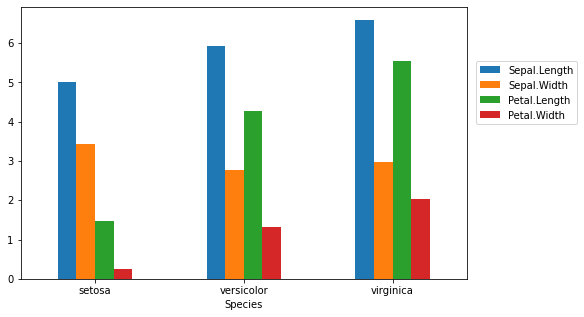

In [15]:
import matplotlib.pyplot as plt
g.plot(kind = 'bar', rot=0, figsize=(8,5))
plt.legend(bbox_to_anchor=(1.02, 0.8), loc=2, borderaxespad=0.)

In [20]:
iris_df.groupby(iris_df.Species).describe().transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [24]:
g = iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']]).mean()
g 

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [25]:
g.unstack() # 끝에 있는 인덱스 Petal.Width가 컬럼값

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [26]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

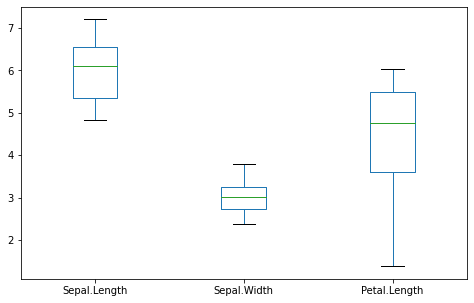

In [28]:
g.plot.box(figsize=(8,5))

In [30]:
g = iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']])['Sepal.Length'].mean()
g

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [31]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [33]:
import pandas as pd
pd.options.display.max_columns

20

In [34]:
pd.options.display.max_columns = 22

In [35]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.972414,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 데이터

In [37]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group

In [40]:
for idx, grouped in enumerate(iris_group):
    print(idx, '번째 그룹은')
    print(grouped)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번째 그룹은
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14   

In [44]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', species_name)
    print(group.sample(5).sort_index()) # 샘플로 5개 랜덤으로 추출
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
7            5.0          3.4           1.5          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa
25           5.0          3.0           1.6          0.2  setosa
35           5.0          3.2           1.2          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 번째 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
50           7.0          3.2           4.7          1.4  versicolor
78           6.0          2.9           4.5          1.5  versicolor
84           5.4          3.0           4.5          1.5  versicolor
85           6.0          3.4           4.5          1.6  versicolor
93           5.0          2.3           3.3          1.0  versicolor
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 번째 그룹은 virginica

## 8.3 데이터프레임 그룹 인덱싱

In [46]:
'''
for idx, (species_name, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', species_name)
    print(group.iloc[[1,11],:])
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
'''
t = iris_df.groupby(iris_df.Species).take([1,11,21,31]) # 각 종별 1,11,21,31번째만 가져오기
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             4.9          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            5.1          3.7           1.5          0.4
           31            5.4          3.4           1.5          0.4
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
           81            5.5          2.4           3.7          1.0
virginica  101           5.8          2.7           5.1          1.9
           111           6.4          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0
           131           7.9          3.8           6.4          2.0

In [48]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4


## 8.4 레이블(원핫인코딩)

In [49]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris_df.Species.describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [52]:
# 레이블을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절. 데이터 구조변경

## 9.1 와이드 포맷 VS 롱포맷

In [54]:
import statsmodels.api as sm
# package 생략시 dattasets
airquality_data = sm.datasets.get_rdataset("airquality") 
airquality = airquality_data.data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅(unpivoting)

In [58]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [57]:
airquality.sample()

,Ozone,Solar.R,Wind,Temp,Month,Day
151,18.0,131.0,8.0,76,9,29


In [59]:
airquality.melt(id_vars=['Month','Day'], 
                var_name='변수', 
                value_name='값')

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [64]:
airquality_melted_sort = airquality_melted.sort_values(by=['Month', 'Day'])
airquality_melted_sort.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [61]:
airquality.head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1


In [65]:
import pandas as pd
airquality.melt(id_vars=['Month','Day'])
# pd.airquality.melt(id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


## 9.3 pivot_table을 이용한 피벗팅 (롱형 -> 와이드형)

In [85]:
# 멜트된 데이터 프레임 : airquality_melted, airquality_melted_sort
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                                             columns=['variable'],
                                             values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [86]:
airquality2.loc[5].head() # 5월달 데이터 가져오기

value                    
variable Ozone Solar.R  Temp  Wind
Day                               
1         41.0   190.0  67.0   7.4
2         36.0   118.0  72.0   8.0
3         12.0   149.0  74.0  12.6
4         18.0   313.0  62.0  11.5
5          NaN     NaN  56.0  14.3

In [96]:
airquality2 = airquality2.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [87]:
airquality2.columns

MultiIndex([('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [88]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2

variable   Ozone  Solar.R  Temp  Wind
Month Day                            
5     1     41.0    190.0  67.0   7.4
      2     36.0    118.0  72.0   8.0
      3     12.0    149.0  74.0  12.6
      4     18.0    313.0  62.0  11.5
      5      NaN      NaN  56.0  14.3
...          ...      ...   ...   ...
9     26    30.0    193.0  70.0   6.9
      27     NaN    145.0  77.0  13.2
      28    14.0    191.0  75.0  14.3
      29    18.0    131.0  76.0   8.0
      30    20.0    223.0  68.0  11.5

[153 rows x 4 columns]

In [89]:
# airquality_melted_sort 데이터 프레임을 와이드 형으로 피벗팅
airquality3 = airquality_melted_sort.pivot_table(index=['Month', 'Day'],
                                                columns=['variable'],
                                                values=['value'])
airquality3

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [90]:
airquality3 = airquality3.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality3.head()

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3

In [91]:
airquality3.columns = airquality3.columns.droplevel(level=0)
airquality3.head()

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [93]:
import numpy as np
a = None
print(a)

None


In [95]:
if a == None:
    print('a==None')
else:
    print('a가 None이 아닙니다.')


a==None


In [ ]:
# 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv 을   df_last 변수에 
# 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv 을 df_first변수 입력받음
# df_last랑 df_first랑 concat하기 위해 df_first를 df_last와 참조하여 변환합니다.

# 단, 시간별 평당분양가격의 추이, 지역별 평당분양가격의 추이를 분석할 예정입니다.

In [120]:
import pandas as pd
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',
                     encoding='cp949')
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841


In [104]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [107]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [121]:
df_last["연도"] = df_last["연도"].astype('str')

In [122]:
df_last["월"] = df_last["월"].astype('str')

In [123]:
import pandas as pd
df_last["분양가격(㎡)"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

In [124]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    378
dtype: int64

In [125]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841.0


In [126]:
df_last["평당분양가격"] = df_last["분양가격(㎡)"] * 3.3

In [127]:
df_last["연도월"] = df_last["연도"] + "년" +  df_last["월"] +"월"

In [128]:
df_last.sample()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,연도월
3764,대구,전용면적 102㎡초과,2019,6,4458.0,14711.4,2019년6월


In [129]:
new_last = df_last.loc[df_last["규모구분"]=='전체', 
                       ['지역명', '연도월','평당분양가격']]
new_last.sample()

,지역명,연도월,평당분양가격
2810,인천,2018년7월,11127.6


In [130]:
# concat 하기 위해 df_first를 new_first로 바꾸기 (지역명, 연도, 월, 평당분양가격)
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                     encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [131]:
new_first = df_first.melt(id_vars="지역", 
                          var_name="연도월", 
                          value_name="평당분양가격")
new_first.sample()

,지역,연도월,평당분양가격
239,부산,2015년2월,9235


In [132]:
new_first.columns = ['지역명', '연도월', '평당분양가격']

In [133]:
new_first.sample()

,지역명,연도월,평당분양가격
149,전남,2014년8월,5685


In [134]:
result = pd.concat([new_first, new_last])

In [137]:
import numpy as np
year = [2020,2020,2020,2021,2021,2021,]
mon = [1,2,3] * 2
latte = [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                    columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [138]:
sales_melted = sales.melt(id_vars=['year','mon'])
sales_melted

,year,mon,variable,value
0,2020,1,latte,410
1,2020,2,latte,401
2,2020,3,latte,402
3,2021,1,latte,400
4,2021,2,latte,404
5,2021,3,latte,405
6,2020,1,americano,500
7,2020,2,americano,483
8,2020,3,americano,484
9,2021,1,americano,470


In [140]:
sales2 = sales_melted.pivot_table(index=['year','mon'],
                                 columns=['variable'],
                                 values=['value'])
sales2

value            
variable americano latte mocha
year mon                      
2020 1         500   410   350
     2         483   401   299
     3         484   402   300
2021 1         470   400   301
     2         486   404   302
     3         488   405   300

In [141]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales


,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [143]:
latte_sales.pivot('year','mon') # year는 index로, mon은 column으로

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 10절. 데이터프레임에 함수 적용 시키기

## 10.1 apply
- 데이터프레임이나 시리즈에 각 열 또는 각 행에 함수 적용


In [146]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset('iris',package='datasets').data
iris_df.head

<bound method NDFrame.head of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [147]:
# 독랍변수
iris_df.iloc[:,:-1].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [148]:
X = iris_df.loc[:,'Sepal.Length':'Petal.Width']

In [149]:
X.apply(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [150]:
X.apply(np.sum, axis=0) # 열별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [151]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [157]:
#각각의 데이터와 평균과의 거리를 출력
avg = X.apply(np.average)
X.apply(lambda x : x - avg, axis = 1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [158]:
#각각의 데이터와 평균과의 거리를 출력: 리스트 형태로 출력
avg = X.apply(np.average)
X.apply(lambda x : list(x - avg), axis = 1) 

0      [-0.7433333333333341, 0.4426666666666663, -2.3...
1      [-0.9433333333333334, -0.05733333333333368, -2...
2      [-1.1433333333333335, 0.1426666666666665, -2.4...
3      [-1.243333333333334, 0.04266666666666641, -2.2...
4      [-0.8433333333333337, 0.5426666666666664, -2.3...
                             ...                        
145    [0.8566666666666665, -0.05733333333333368, 1.4...
146    [0.4566666666666661, -0.5573333333333337, 1.24...
147    [0.6566666666666663, -0.05733333333333368, 1.4...
148    [0.35666666666666647, 0.34266666666666623, 1.6...
149    [0.05666666666666664, -0.05733333333333368, 1....
Length: 150, dtype: object

In [159]:
#각각의 데이터와 평균과의 거리를 출력
# result_type='broadcast' : 출력 타입을 원본 데이터 그대로 출력
avg = X.apply(np.average)
X.apply(lambda x : list(x - avg), axis = 1, result_type='broadcast') 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [160]:
new_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [161]:
date = '2021년 3월'
date.split('년')

['2021', ' 3월']

In [162]:
def parse_year(x):
    return int(x.split('년')[0])
parse_year(date)

2021

In [163]:
def parse_mon(x):
    return int(x.split('년')[-1].replace('월',''))
parse_mon(date)

3

In [164]:
new_first.sample()

,지역명,연도월,평당분양가격
219,경남,2014년12월,7332


In [165]:
new_first["연도"] = new_first["연도월"].apply(lambda x : int(x.split('년')[0]))

In [166]:
new_first['월'] = new_first['연도월'].apply(lambda x : 
                                        int(x.split('년')[-1].replace('월',"")))

In [167]:
new_first.head(2)

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


## 10.2 applymap
- apply : 행 또는 열단위로 함수 적용(데이터프레임이나 시리즈에 가능)
- applymap : 각 요소 개별로 적용(데이터프레임에 가능)

In [168]:
X.apply(np.sum, axis=0)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [169]:
X.applymap(np.sum) # 요소별로 적용

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [170]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- 시리즈 타입의 벡터만 가능

In [174]:
new_first['연도'] = new_first['연도월'].map(lambda x : int(x.split('년')[0]))

In [175]:
x = pd.Series(['홍길동',20,'서울 마포'], index=['name','age','address'])
x

name         홍길동
age           20
address    서울 마포
dtype: object

In [177]:
def my_func(data):
    return data, len(str(data))
my_func(20)

(20, 2)

In [178]:
x.map(my_func)

name         (홍길동, 3)
age           (20, 2)
address    (서울 마포, 5)
dtype: object

In [179]:
x.map(lambda data : (data, len(str(data))))

name         (홍길동, 3)
age           (20, 2)
address    (서울 마포, 5)
dtype: object

In [182]:
# 딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈 값에 적용
dic = {'홍길동':'김길동', 20:25, '서울 마포':'서대문'}
x.map(dic)

name       김길동
age         25
address    서대문
dtype: object

In [183]:
s = pd.Series([1,2,3,4,None])

In [185]:
s.map(lambda x : (x, x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [186]:
# 연산 적용이 안되는 부분은 적용하지 않도록
s.map(lambda x : (x, x**2), na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11절. 일괄 변경하기(결측치나 특정값)

## 11.1 fillna(결측치를 특정한 값으로 바꾸기)

In [187]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, 3, np.nan, 5],
                  [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [188]:
# 모든 결측치를 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [189]:
# 결측치가 아닌 이전값 또는 다음값으로 대체
    # pad / ffill : 결측치가 아닌 이전값으로 채움
    # backfill / bfill : 결측치가 아닌 다음값으로 채움
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [190]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [191]:
values = {'A':99, 'B':98, 'C':97, 'D': 95} # 열별 결측치 대체값
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [193]:
df.fillna(value=df.mean()) # 모두 결측치가 있는 c컬럼이 결측치 대체가 안됨

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [197]:
mean = df.mean()
from math import isnan
for idx, value in mean.items():
    if isnan(value):
        mean[idx] = 0
mean

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

In [198]:
df.fillna(value=mean)

,A,B,C,D
0,3.0,2,0.0,0
1,3.0,4,0.0,1
2,3.0,3,0.0,5
3,3.0,3,0.0,4


In [200]:
df.fillna(value=values, limit=3) # limit 값으로 NaN 값 대체

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 11.2 replace(to_value, new_value, inplace=False)
      - to value를 new_value로 변경
      - inplace = False : 변경된 내용을 반환, 데이터프레임에 적용 안됨
      - inplace = True : 변경된 내용이 데이터 프레임에 적용되고 반환값은 없음

In [201]:
s = pd.Series([0,1,2,3,4,None])
s.replace(0,5,inplace=True)

In [203]:
s.replace

<bound method Series.replace of 0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64>

In [205]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                   'B':[5,6,7,8,9],
                   'C':['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [206]:
df.replace([0,1,2,3],[99,98,97,96]) # 0은 99로 1은 98로 대체

,A,B,C
0,99,5,a
1,98,6,b
2,97,7,c
3,96,8,d
4,4,9,e


In [208]:
df.replace(range(4), range(4,0,-1)) # [0,1,2,3]을 [4,3,2,1]로 대체

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [209]:
df.replace({'A':0, 'B':5}, 99) # A열의 0과 B열의 5를 99로 대체

,A,B,C
0,99,99,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [210]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [211]:
# to_value에 정규표현식이 사용된 경우
# ba로 시작하고 마지막 임의의 문자가 있는 문자열 변환
df.replace(r'^ba.$', 'newBar', regex=True)

,A,B
0,newBar,abc
1,foo,newBar
2,bait,xyz


In [213]:
df.replace({'A':r'^ba.$'},{'A':'newBar'}, regex=True)

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


## 11.3 where, mask
- where : 조건이 만족하는 요소를 그대로 출력
- mask : where 절의 반대

In [6]:
s = pd.Series(range(0,4))

In [7]:
s.where(s>0) # 조건이 만족하는 값만 보이고 만족하지 않으면 결측치로 대체

0    NaN
1    1.0
2    2.0
3    3.0
dtype: float64

In [8]:
s.where(s>0, 90)

0    90
1     1
2     2
3     3
dtype: int64

In [9]:
s.mask(s>0)

0    0.0
1    NaN
2    NaN
3    NaN
dtype: float64

In [10]:
s.mask(s>0, -s) # 기존의 s값에 -만 붙여서 출력

0    0
1   -1
2   -2
3   -3
dtype: int64

## 11.4 dropna
- 결측치가 있는 데이터를 누락시킴

In [220]:
df = pd.DataFrame({'name':['박길동','김길동','홍길동',np.nan],
                   'age':[np.nan,20,60,np.nan],
                   'born':[np.nan,'서울',np.nan,np.nan]})
df

,name,age,born
0,박길동,NaN,NaN
1,김길동,20.0,서울
2,홍길동,60.0,NaN
3,NaN,NaN,NaN


In [221]:
df.dropna() # 결측치가 1개라도 있는 행 삭제

,name,age,born
1,김길동,20.0,서울


In [223]:
df.dropna(how='all', inplace=True) # 행의 모든 열의 데이터가 다 결측치인 행 삭제
df

,name,age,born
0,박길동,NaN,NaN
1,김길동,20.0,서울
2,홍길동,60.0,NaN


In [225]:
df.dropna(axis='columns') # 결측치가 있는 열들 제거

,name
0,박길동
1,김길동
2,홍길동


In [226]:
#결측치가 2개 이상인 행만 삭제
df.dropna(thresh=2)

,name,age,born
1,김길동,20.0,서울
2,홍길동,60.0,NaN


## 11.5 astype
- 판다스의 dtype 속성을 변경

In [229]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [230]:
# int64 타입인 '월' columns을 문자 타입으로 변경
new_first['월'] = new_first['월'].astype('str')

In [231]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.1+ KB


In [234]:
new_first['평당가격'] = new_first['평당분양가격'].astype('float64', copy=True)
# new_first['평당가격']이 바뀌어도 new_first['평당분양가격']이 영향을 받지 않는다.
new_first

,지역명,연도월,평당분양가격,연도,월,평당가격
0,서울,2013년12월,18189,2013,12,18189.0
1,부산,2013년12월,8111,2013,12,8111.0
2,대구,2013년12월,8080,2013,12,8080.0
3,인천,2013년12월,10204,2013,12,10204.0
4,광주,2013년12월,6098,2013,12,6098.0
...,...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8,6580.0
353,전남,2015년8월,6289,2015,8,6289.0
354,경북,2015년8월,7037,2015,8,7037.0
355,경남,2015년8월,7665,2015,8,7665.0


# 12절. 시리즈

In [236]:
s = pd.Series([1000,2000,2500, 3000, 4000],
              index=['apple','banana','mango', 'kiwi','watermelon'])
s

apple         1000
banana        2000
mango         2500
kiwi          3000
watermelon    4000
dtype: int64

In [237]:
s['mango']

2500

In [240]:
s[['mango','watermelon']]

mango         2500
watermelon    4000
dtype: int64

In [242]:
s = s.drop('mango')

In [243]:
s

apple         1000
banana        2000
kiwi          3000
watermelon    4000
dtype: int64

In [244]:
s.sort_values() # 오름차순 정렬

apple         1000
banana        2000
kiwi          3000
watermelon    4000
dtype: int64

In [245]:
s.sort_values(ascending=False) # 내림차순 정렬

watermelon    4000
kiwi          3000
banana        2000
apple         1000
dtype: int64

In [246]:
s.to_frame().T

,apple,banana,kiwi,watermelon
0,1000,2000,3000,4000
